<a href="https://colab.research.google.com/github/xxxnmxhj00/YOLO/blob/main/6_1%EC%9E%A5_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환 신경망

- Embedding 층은 수많은 단어를 벡터 형태로 표현

### 토큰

- 문법적으로 더 이상 나눌 수 없는 언어 요소
- 이를 수행하는 작업을 토큰화 라고 함



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

데이터 준비

In [ ]:
texts = ['you are the Best',
          'You are the Nice']

Tokenizer() 함수를 사용해서 토큰화 작업 수행

- oov token : 데이터에 나타나지 않은 단어를 전달된 단어로 교체
- fit_on_texts : 함수를 통해 데이터에 적용하고 texts to sequences 함수로 변환

In [ ]:
tokenizer = Tokenizer(num_words=10, oov_token='OOV')
tokenizer.fit_on_texts(texts)

word_index = tokenizer.word_index
print(word_index)
print('-'*70)

sequences = tokenizer.texts_to_sequences(texts)
print(f'sequences : {sequences}\n')


{'OOV': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
----------------------------------------------------------------------
sequences : [[2, 3, 4, 5], [2, 3, 4, 6]]



In [ ]:
# 배열은 10개임 ,

binary_result = tokenizer.sequences_to_matrix(sequences, mode='binary')
print(f'binary_vectors: \n {binary_result}\n')


binary_vectors: 
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]



In [ ]:
# 원 - 핫 형태로 인코딩
print(to_categorical(sequences))

[[[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


In [ ]:
test_text = ['You are the one']
test_seq = tokenizer.texts_to_sequences(test_text)

print(f'test sequences:{test_seq}')

test sequences:[[2, 3, 4, 1]]


Embedding 층을 활용하여 IMDB 데이터셋 문제를 해결

데이터셋 다운

- num_words 인자를 통해 사용할 단어의 개수를 조절
- 학습데이터 테스트 데이터는 5:5

In [ ]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


데이터 형태 확인하기

- 데이터에서 확인할 수 있는 숫자는 빈번하게 사용되는 정도를 나타냄
레이블 -> 1긍정 0 부정

In [ ]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [ ]:
# 첫 번째 데이터 확인하기
print(X_train[0])
print('-'*300)
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
------------------------------------------------------------

In [ ]:
len(X_train[0])

218

In [ ]:
len(X_train[1])

189

IMDB 데이터셋에서 가장 빈번하게 사용되는 세개의 단어

In [ ]:
imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
    imdb_get_word_index[value] = key

for i in range(1,4):
    print(f'{i}번째 단어 : {imdb_get_word_index[i]}')

1번째 단어 : the
2번째 단어 : and
3번째 단어 : a


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500
print('Before pad_sequences: ' , len(X_train[0]))
pad_X_train = pad_sequences(X_train,
                        maxlen=max_len,
                        padding = 'pre')
pad_X_test = pad_sequences(X_test,
                       maxlen=max_len,
                       padding = 'pre')
print('After pad_sequences:', len(pad_X_train[0]))

Before pad_sequences:  218
After pad_sequences: 500


In [ ]:
pad_X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
for i in X_train[0]:
    print(imdb_get_word_index[i], end=' ')

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

model = Sequential()

model.add(Input(shape=(max_len,)))
model.add(Embedding(input_dim=num_words, output_dim=32))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          16,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 336,001 (1.28 MB)

 Trainable params: 336,001 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(pad_X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2) # 전체데이터에서 20 % 만 니가 검증해서 써라

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.6500 - loss: 0.6002 - val_acc: 0.8676 - val_loss: 0.3124
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9185 - loss: 0.2221 - val_acc: 0.8686 - val_loss: 0.3081
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9718 - loss: 0.1093 - val_acc: 0.8640 - val_loss: 0.3318
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9911 - loss: 0.0540 - val_acc: 0.8666 - val_loss: 0.3397
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9975 - loss: 0.0254 - val_acc: 0.8678 - val_loss: 0.3602
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9997 - loss: 0.0118 - val_acc: 0.8626 - val_loss: 0.3935
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9998 - loss: 0.0069 - val_acc: 0.8632 - val_loss: 0.4180
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9999 - loss: 0.0039 - val_acc: 0.8604 - val_loss: 0.4515
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

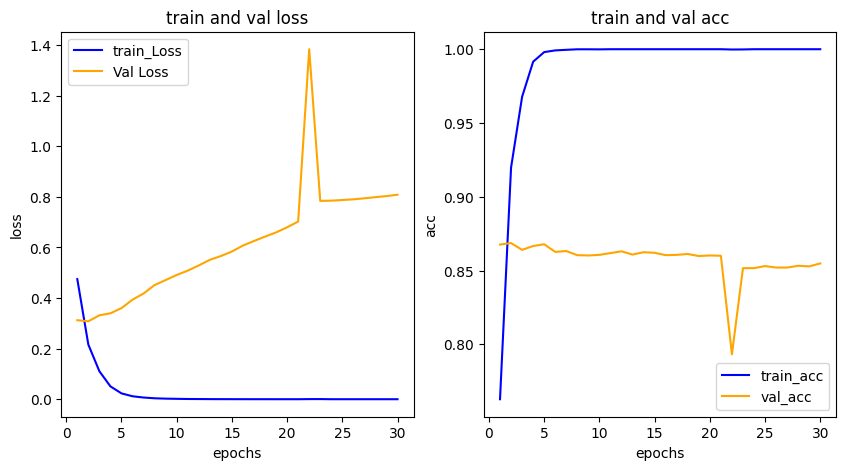

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()